In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [23]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [26]:
X = train_data.drop('label', axis = 1)
y = train_data['label']

In [27]:
Xr = X.values.reshape(-1, 28, 28, 1)
test_set = test_data.values.reshape(-1,28,28, 1)

In [28]:
yr = tf.keras.utils.to_categorical(y, num_classes=10)

In [29]:
Xr.shape, yr.shape

((42000, 28, 28, 1), (42000, 10))

In [30]:
# Image Augmentation 

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.1,
                                   zoom_range = 0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=10,)

Xr1 = train_datagen.flow(x=Xr, y=yr, batch_size=32)

In [31]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_setr1 = test_datagen.flow(x=test_set, batch_size=32)

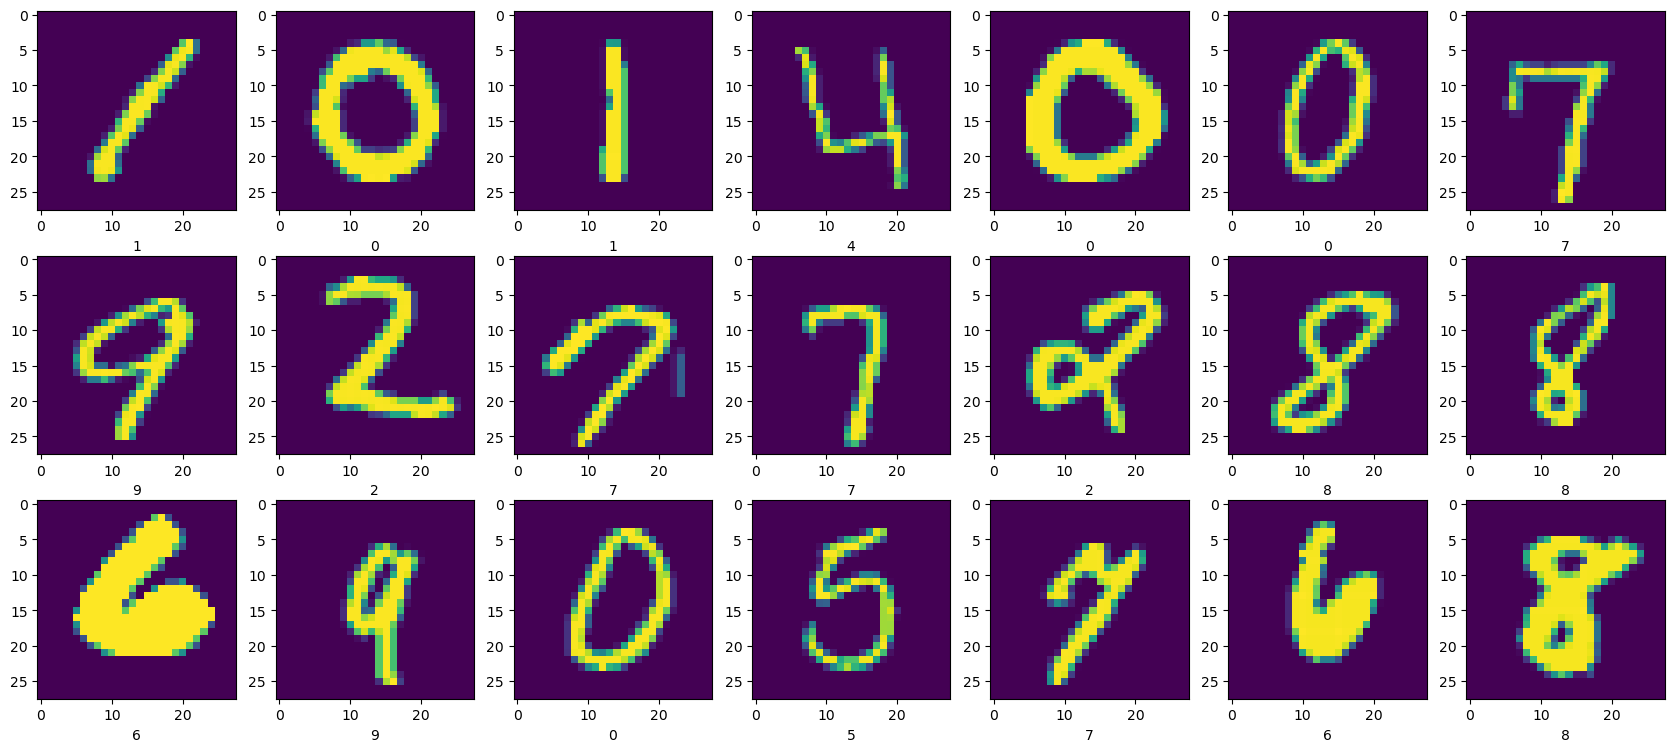

In [32]:
f,ax = plt.subplots(3, 7, figsize=(21,9))
for i in range(7):
    ax[0][i].imshow(Xr[i])
    ax[0][i].set_xlabel(y[i])
    ax[1][i].imshow(Xr[i+100])
    ax[1][i].set_xlabel(y[i+100])
    ax[2][i].imshow(Xr[i+500])
    ax[2][i].set_xlabel(y[i+500])
    
plt.show()

In [33]:
cnn = tf.keras.models.Sequential()

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding more layers

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
cnn.fit(x=Xr1, epochs = 15)

Epoch 1/15
1313/1313 [==============================] - 34s 25ms/step - loss: 0.2283 - accuracy: 0.9266
Epoch 2/15
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0745 - accuracy: 0.9766
Epoch 3/15
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0570 - accuracy: 0.9825
Epoch 4/15
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0500 - accuracy: 0.9842
Epoch 5/15
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 6/15
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0392 - accuracy: 0.9876
Epoch 7/15
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 8/15
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0321 - accuracy: 0.9897
Epoch 9/15
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0290 - accuracy: 0.9907
Epoch 10/15
1313/1313 [==============================] - 33s 25m

In [36]:
ypred = cnn.predict(test_set)

875/875 [==============================] - 7s 8ms/step


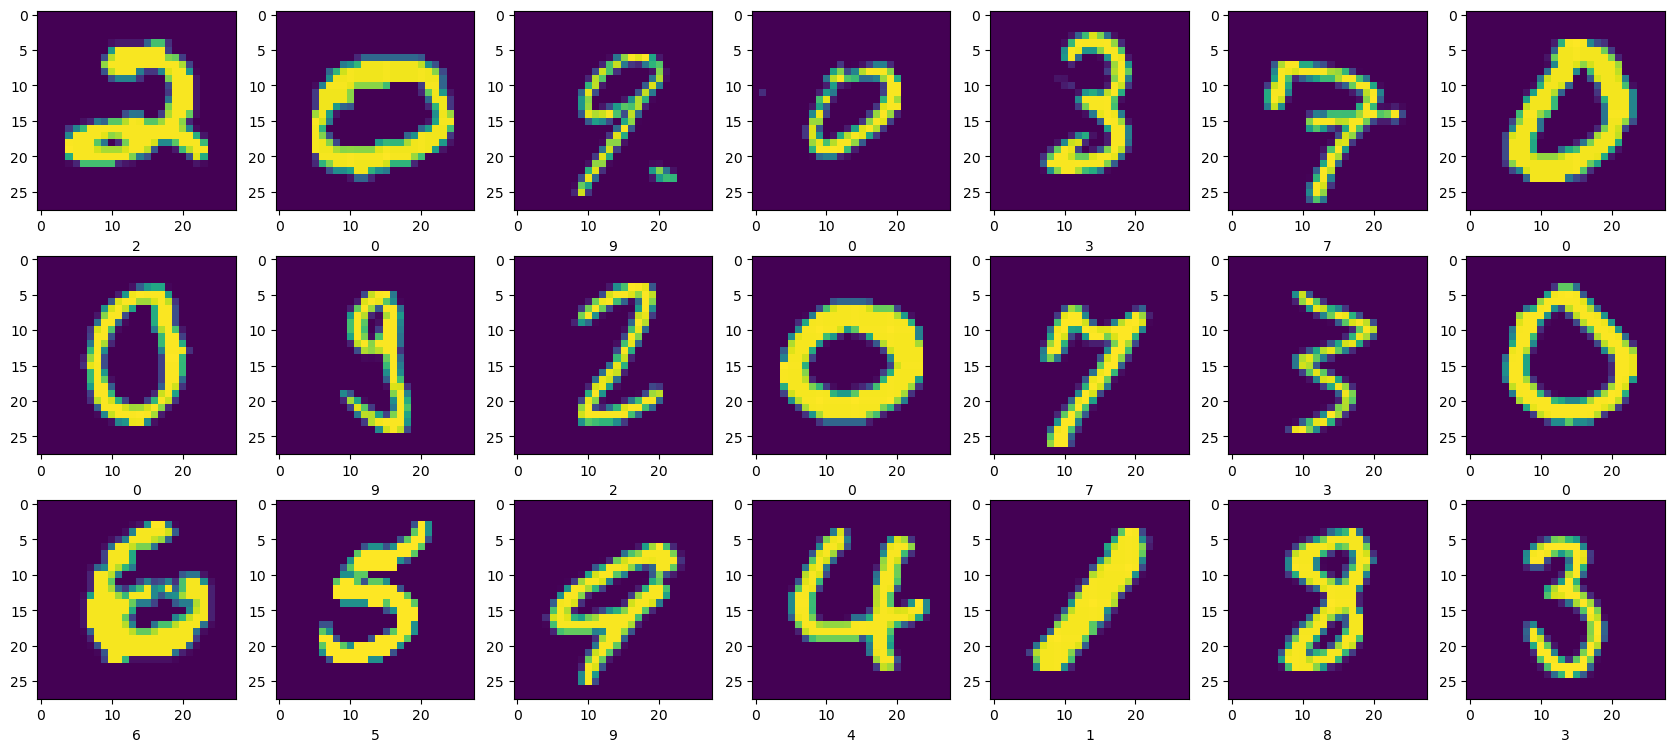

In [38]:
# visualization
test_preds = []
for i in range(len(ypred)):
    test_preds.append(np.argmax(ypred[i]))
f,ax = plt.subplots(3, 7, figsize=(21,9))
for i in range(7):
    ax[0][i].imshow(test_set[i])
    ax[0][i].set_xlabel(test_preds[i])
    ax[1][i].imshow(test_set[i+100])
    ax[1][i].set_xlabel(test_preds[i+100])
    ax[2][i].imshow(test_set[i+500])
    ax[2][i].set_xlabel(test_preds[i+500])
    
plt.show()

In [39]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub.Label = test_preds

In [42]:
sub.to_csv('submission.csv', index=False)